## Resources

- [Toward Data Science: Image Recognition](https://towardsdatascience.com/image-recognition-with-machine-learning-on-python-image-processing-3abe6b158e9a)

In [8]:
import glob
import splitfolders

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters
from skimage.transform import resize, rotate
from skimage.color import rgb2gray

import tensorflow as tf


## Split Data

In [6]:
splitfolders.ratio('data', output='split-data', seed=123, ratio=(0.8, 0.2), group_prefix=None)

Copying files: 7553 files [00:05, 1490.23 files/s]


## Load Data

In [28]:
train = []

for filename in glob.glob('split-data/train/with_mask/*.jpg'):
    image = io.imread(filename)
    train.append((image, 0))

for filename in glob.glob('split-data/train/without_mask/*.jpg'):
    image = io.imread(filename)
    train.append((image, 1))

In [29]:
test = []

for filename in glob.glob('split-data/test/with_mask/*.jpg'):
    image = io.imread(filename)
    test.append((image, 0))

for filename in glob.glob('split-data/test/without_mask/*.jpg'):
    image = io.imread(filename)
    test.append((image, 1))

In [30]:
len(train) + len(test)

7553

In [31]:
# Shuffled data for randomness
np.random.shuffle(train)
np.random.shuffle(test)

In [33]:
len(train) + len(test)

7553

In [34]:
# Create image lists and label lists
train_imgs = [data[0] for data in train]
train_labels = [data[1] for data in train]
test_imgs = [data[0] for data in test]
test_labels = [data[1] for data in test]

In [37]:
len(train_labels) + len(test_labels)

7553

## Image Processing

In [39]:
image = train_imgs[0]
print(type(image))
print(image.shape)

<class 'numpy.ndarray'>
(225, 225, 3)


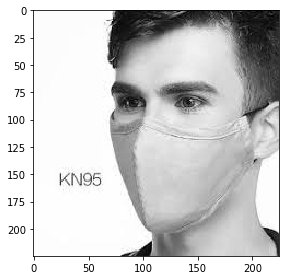

In [40]:
image_gray = rgb2gray(image)
io.imshow(image_gray);

In [2]:
import numpy as np
import pandas as pd 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os